# Importing Libraries

In [1]:
#Import libraries to perform operations in dataframes, plots, statistical analysis and scaling
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from sklearn.preprocessing import StandardScaler

# Importing Data

In [2]:
#Data is available in .txt files. Import one file and observe data
data = pd.read_csv('ASX-2015-2018/ASX-2015-2018/20150102.txt', header = None)
print(data)

        0         1         2         3        4         5       6
0     1PG  20150102     1.195     1.240     1.16     1.215  607639
1     3PL  20150102     2.290     2.290     2.17     2.260    1863
2     8IH  20150102     0.340     0.345     0.34     0.340  112700
3     AAA  20150102    50.100    50.110    50.09    50.110  409863
4     AAC  20150102     1.455     1.470     1.45     1.470   90150
...   ...       ...       ...       ...      ...       ...     ...
1101  XTJ  20150102  2086.800  2090.300  2072.40  2086.900       0
1102  XTL  20150102  3398.800  3411.900  3377.60  3409.900       0
1103  XTO  20150102  4513.000  4532.700  4492.00  4532.000       0
1104  XUJ  20150102  5914.200  5963.600  5898.70  5936.500       0
1105  XXJ  20150102  7282.200  7303.500  7236.00  7299.700       0

[1106 rows x 7 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1106 non-null   object 
 1   1       1106 non-null   int64  
 2   2       1106 non-null   float64
 3   3       1106 non-null   float64
 4   4       1106 non-null   float64
 5   5       1106 non-null   float64
 6   6       1106 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 60.6+ KB


In [4]:
#glob is used to import all files that match a specific pattern
from glob import glob

In [5]:
files = glob('ASX-2015-2018/ASX-2015-2018/20*')

In [6]:
#Combile all files and observe
data = pd.concat((pd.read_csv(file,header=None, names=["Ticker", "Date", "Open","High","Low","Close","Volume"]) for file in files), ignore_index= True)

In [7]:
data.head()

,Ticker,Date,Open,High,Low,Close,Volume
0,1PG,20150102,1.195,1.240,1.16,1.215,607639
1,3PL,20150102,2.290,2.290,2.17,2.260,1863
2,8IH,20150102,0.340,0.345,0.34,0.340,112700
3,AAA,20150102,50.100,50.110,50.09,50.110,409863
4,AAC,20150102,1.455,1.470,1.45,1.470,90150


In [8]:
data.tail()

,Ticker,Date,Open,High,Low,Close,Volume
1319992,XTJ,20180629,985.1,988.7,980.7,984.0,0
1319993,XTL,20180629,3441.0,3449.4,3427.5,3427.5,0
1319994,XTO,20180629,5105.5,5119.5,5088.9,5088.9,0
1319995,XUJ,20180629,8133.8,8253.0,8133.8,8193.3,0
1319996,XXJ,20180629,6974.5,6993.9,6934.1,6934.1,0


# Data Preprocessing

In [9]:
#Changing the format of 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y%m%d')
data

,Ticker,Date,Open,High,Low,Close,Volume
0,1PG,2015-01-02,1.195,1.240,1.16,1.215,607639
1,3PL,2015-01-02,2.290,2.290,2.17,2.260,1863
2,8IH,2015-01-02,0.340,0.345,0.34,0.340,112700
3,AAA,2015-01-02,50.100,50.110,50.09,50.110,409863
4,AAC,2015-01-02,1.455,1.470,1.45,1.470,90150
...,...,...,...,...,...,...,...
1319992,XTJ,2018-06-29,985.100,988.700,980.70,984.000,0
1319993,XTL,2018-06-29,3441.000,3449.400,3427.50,3427.500,0
1319994,XTO,2018-06-29,5105.500,5119.500,5088.90,5088.900,0
1319995,XUJ,2018-06-29,8133.800,8253.000,8133.80,8193.300,0


In [10]:
Open = data[['Ticker','Date','Open']]
Open

,Ticker,Date,Open
0,1PG,2015-01-02,1.195
1,3PL,2015-01-02,2.290
2,8IH,2015-01-02,0.340
3,AAA,2015-01-02,50.100
4,AAC,2015-01-02,1.455
...,...,...,...
1319992,XTJ,2018-06-29,985.100
1319993,XTL,2018-06-29,3441.000
1319994,XTO,2018-06-29,5105.500
1319995,XUJ,2018-06-29,8133.800


In [11]:
data.groupby('Ticker')['Date'].nunique()

Ticker
1AD     281
1AG     443
1AL     250
1PG     550
1ST     479
       ... 
ZTA     115
ZUSD    538
ZYB     511
ZYL       1
ZYUS    538
Name: Date, Length: 2773, dtype: int64

In [12]:
#Processing the data to required format in the task having 'Date' as index and 'Ticker' as column IDs.
Open_df = Open.pivot(index='Date', columns='Ticker',values='Open')
Open_df.head()

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.195,NaN,NaN,NaN,2.29,NaN,NaN,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.230,NaN,NaN,NaN,2.22,NaN,NaN,...,NaN,NaN,4.5,NaN,0.070,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.260,NaN,NaN,NaN,2.06,NaN,NaN,...,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.245,NaN,NaN,NaN,2.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.250,NaN,NaN,NaN,2.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
High = data[['Ticker','Date','High']]
High_df = High.pivot(index='Date', columns='Ticker',values='High')
High_df.head()

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.24,NaN,NaN,NaN,2.29,NaN,NaN,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.30,NaN,NaN,NaN,2.30,NaN,NaN,...,NaN,NaN,4.5,NaN,0.070,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.26,NaN,NaN,NaN,2.10,NaN,NaN,...,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.25,NaN,NaN,NaN,2.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.29,NaN,NaN,NaN,2.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Low = data[['Ticker','Date','Low']]
Low_df = Low.pivot(index='Date', columns='Ticker',values='Low')
Low_df.head()

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.160,NaN,NaN,NaN,2.17,NaN,NaN,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.225,NaN,NaN,NaN,2.07,NaN,NaN,...,NaN,NaN,4.40,NaN,0.070,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.210,NaN,NaN,NaN,2.02,NaN,NaN,...,NaN,NaN,4.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.200,NaN,NaN,NaN,2.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.235,NaN,NaN,NaN,2.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
Close = data[['Ticker','Date','Close']]
Close_df = Close.pivot(index='Date', columns='Ticker',values='Close')
Close_df.head()

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.215,NaN,NaN,NaN,2.26,NaN,NaN,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.265,NaN,NaN,NaN,2.07,NaN,NaN,...,NaN,NaN,4.40,NaN,0.070,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.245,NaN,NaN,NaN,2.08,NaN,NaN,...,NaN,NaN,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.250,NaN,NaN,NaN,2.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.255,NaN,NaN,NaN,2.08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Volume = data[['Ticker','Date','Volume']]
Volume_df = Volume.pivot(index='Date', columns='Ticker',values='Volume')
Volume_df.tail()

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-25,NaN,185465.0,NaN,NaN,NaN,NaN,479134.0,12886.0,722961.0,1212613.0,...,194218.0,130351.0,NaN,214.0,NaN,NaN,3335.0,2844808.0,NaN,659.0
2018-06-26,25000.0,162721.0,NaN,NaN,NaN,NaN,869245.0,12548.0,3363558.0,610143.0,...,44519.0,63966.0,NaN,29898.0,NaN,NaN,7174.0,929999.0,NaN,8835.0
2018-06-27,30000.0,190000.0,NaN,NaN,799428.0,NaN,362710.0,60482.0,470390.0,1903088.0,...,228955.0,140561.0,NaN,0.0,NaN,NaN,19662.0,200000.0,NaN,4984.0
2018-06-28,50024.0,NaN,NaN,NaN,259858.0,NaN,935578.0,34497.0,1048067.0,1388009.0,...,183272.0,92307.0,NaN,1.0,NaN,NaN,1033.0,41562.0,NaN,19060.0
2018-06-29,NaN,466982.0,3000.0,NaN,NaN,NaN,652356.0,2293.0,1504089.0,1379231.0,...,127275.0,191507.0,NaN,0.0,NaN,NaN,8097.0,299999.0,NaN,16299.0


In [17]:
#Creating a shifted dataframe to use in the calculation of future close returns and calculating future close returns using 'Close'
Close_t_plus_1_df=Close_df.shift(periods=-1)
future_close_return=(Close_t_plus_1_df/Close_df)-1
future_close_return

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,0.041152,NaN,NaN,NaN,-0.084071,NaN,NaN,...,NaN,NaN,NaN,NaN,0.044776,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,-0.015810,NaN,NaN,NaN,0.004831,NaN,NaN,...,NaN,NaN,-0.002273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,0.004016,NaN,NaN,NaN,-0.014423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,0.004000,NaN,NaN,NaN,0.014634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,0.015936,NaN,NaN,NaN,0.096154,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,NaN,0.000000,NaN,NaN,NaN,NaN,-0.021739,-0.027344,-0.075472,0.000000,...,0.000000,0.005076,NaN,-0.004509,NaN,NaN,0.001931,0.000000,NaN,0.002342
2018-06-26,0.014286,0.047619,NaN,NaN,NaN,NaN,0.022222,-0.004016,0.020408,-0.022222,...,0.000000,0.010101,NaN,0.000000,NaN,NaN,0.003854,0.200000,NaN,0.007009
2018-06-27,0.042254,NaN,NaN,NaN,-0.025641,NaN,-0.086957,0.008065,0.020000,-0.045455,...,-0.038462,-0.010000,NaN,0.006341,NaN,NaN,0.003839,-0.166667,NaN,0.004640


In [18]:
#Creating a shifted dataframe to use in the calculation of close returns and calculating close return using 'Close'
Close_t_minus_1_df=Close_df.shift(periods=+1)
close_return=(Close_df/Close_t_minus_1_df)-1
close_return

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,0.041152,NaN,NaN,NaN,-0.084071,NaN,NaN,...,NaN,NaN,NaN,NaN,0.044776,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,-0.015810,NaN,NaN,NaN,0.004831,NaN,NaN,...,NaN,NaN,-0.002273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,0.004016,NaN,NaN,NaN,-0.014423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,0.004000,NaN,NaN,NaN,0.014634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,NaN,-0.023256,NaN,NaN,NaN,NaN,0.000000,-0.007752,-0.036364,0.000000,...,-0.071429,-0.005051,NaN,0.000903,NaN,NaN,-0.001927,NaN,NaN,0.000000
2018-06-26,NaN,0.000000,NaN,NaN,NaN,NaN,-0.021739,-0.027344,-0.075472,0.000000,...,0.000000,0.005076,NaN,-0.004509,NaN,NaN,0.001931,0.000000,NaN,0.002342
2018-06-27,0.014286,0.047619,NaN,NaN,NaN,NaN,0.022222,-0.004016,0.020408,-0.022222,...,0.000000,0.010101,NaN,0.000000,NaN,NaN,0.003854,0.200000,NaN,0.007009


In [19]:
#Calculating High/Low ratio using 'Close'
high_low_ratios=High_df/Low_df
high_low_ratios

Ticker,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,4DS,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,1.068966,NaN,NaN,NaN,1.055300,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,1.061224,NaN,NaN,NaN,1.111111,NaN,NaN,...,NaN,NaN,1.022727,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,1.041322,NaN,NaN,NaN,1.039604,NaN,NaN,...,NaN,NaN,1.006865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,1.041667,NaN,NaN,NaN,1.050000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,1.044534,NaN,NaN,NaN,1.014493,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,NaN,1.023810,NaN,NaN,NaN,NaN,1.088889,1.007812,1.056604,1.066667,...,1.125000,1.015306,NaN,1.003607,NaN,NaN,1.00000,1.2,NaN,1.002347
2018-06-26,1.014286,1.023810,NaN,NaN,NaN,NaN,1.111111,1.024390,1.061224,1.044444,...,1.083333,1.020408,NaN,1.000000,NaN,NaN,1.00000,1.0,NaN,1.000779
2018-06-27,1.014286,1.023256,NaN,NaN,1.025641,NaN,1.021739,1.041667,1.040816,1.022727,...,1.076923,1.020305,NaN,1.000000,NaN,NaN,1.00096,1.0,NaN,1.002326


In [20]:
null_count=Close_df.isnull().sum()
#non_null_tick=null_count[min(null_count)]
#non_null_tick

In [21]:
#msno is used to analyse missing values
import missingno as msno

In [22]:
tick=Close_df.columns
tick

Index(['1AD', '1AG', '1AL', '1PG', '1ST', '3DM', '3DP', '3PL', '4CE', '4DS',
       ...
       'ZNO', 'ZNT', 'ZNZ', 'ZOZI', 'ZRL', 'ZTA', 'ZUSD', 'ZYB', 'ZYL',
       'ZYUS'],
      dtype='object', name='Ticker', length=2773)

In [23]:
#Analysing only a portion of 'Close' dataframe as msno plots are not visible for large number of columns
check_nan_matrix=Close_df[tick[60:70]]
check_nan_matrix

Ticker,ADA,ADD,ADH,ADJ,ADN,ADO,ADR,ADT,ADV,ADX
Date,,,,,,,,,,
2015-01-02,0.295,NaN,NaN,0.098,NaN,0.125,NaN,NaN,0.004,0.006
2015-01-05,NaN,NaN,NaN,0.097,NaN,0.125,NaN,NaN,0.005,0.006
2015-01-06,NaN,NaN,NaN,0.094,0.025,0.110,NaN,NaN,0.007,0.006
2015-01-07,NaN,NaN,NaN,0.096,0.025,0.110,NaN,NaN,0.006,0.006
2015-01-08,NaN,0.025,NaN,0.095,NaN,0.115,NaN,NaN,0.006,0.006
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.735,NaN,2.26,0.024,0.007,0.012,0.110,0.435,0.014,0.010
2018-06-26,1.710,NaN,2.29,0.022,0.007,0.014,0.105,0.495,0.013,0.009
2018-06-27,1.705,0.012,2.27,0.022,0.007,0.018,0.110,0.560,0.013,0.010


<AxesSubplot:>

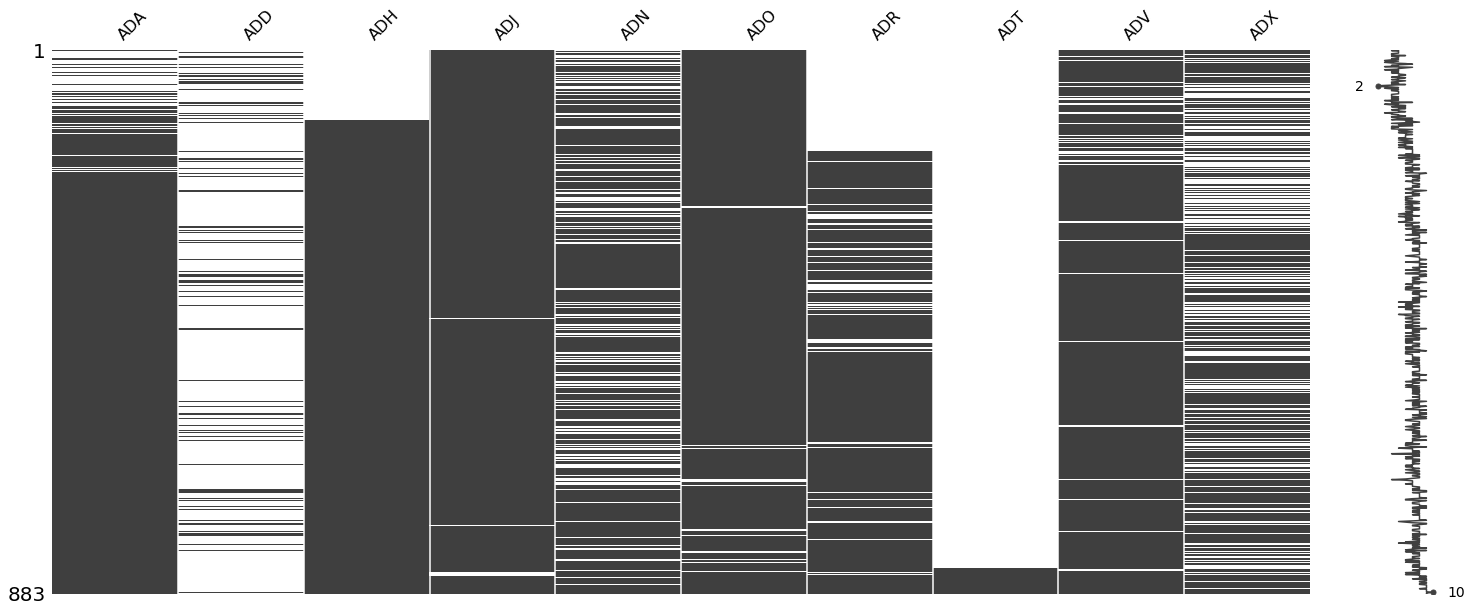

In [24]:
#White space shows NaN values
msno.matrix(check_nan_matrix)

<AxesSubplot:xlabel='Ticker'>

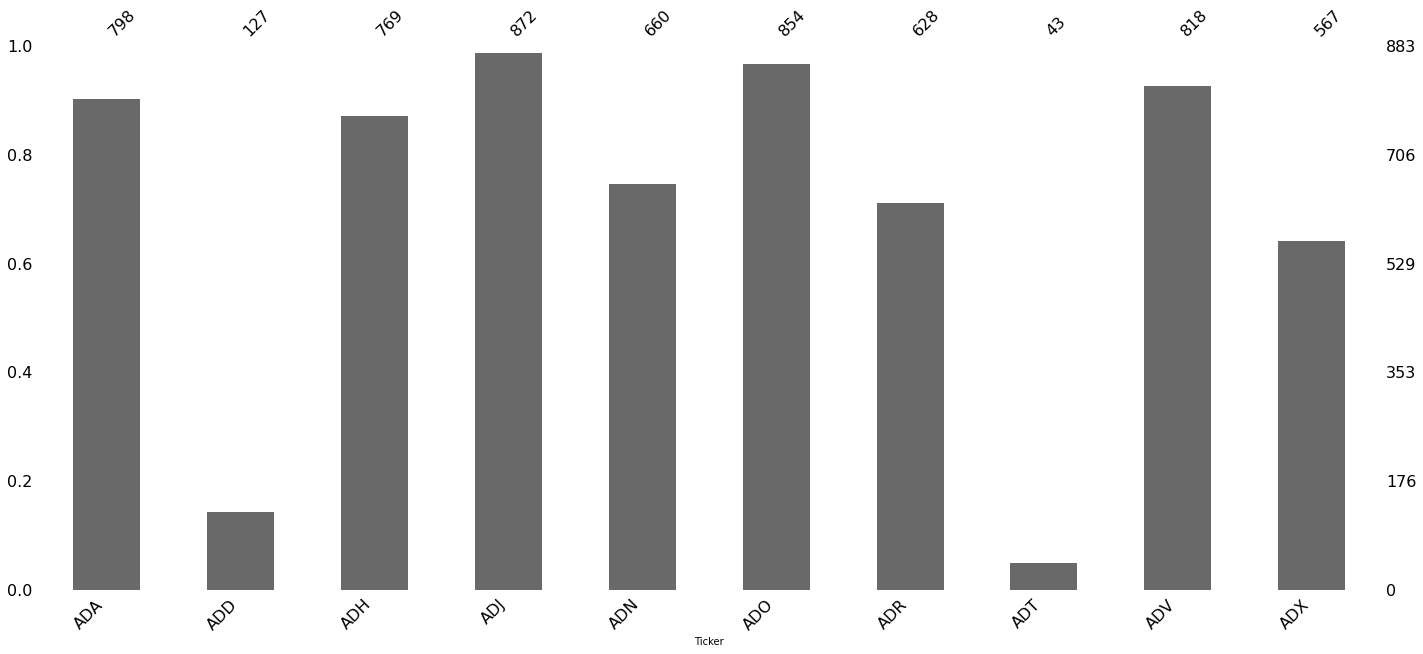

In [25]:
#White space shows NaN values, count gives total number of records that are not null
msno.bar(check_nan_matrix)

[Text(0.5, 1.0, 'Boxplots for Selected Tickers')]

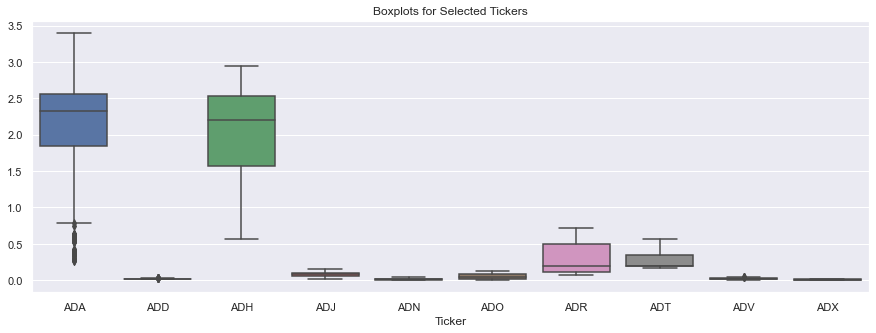

In [59]:
#Analysing only a portion of 'Close' dataframe in boxplots for outliers, check ADA having many outliers
sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(data=check_nan_matrix).set(title='Boxplots for Selected Tickers')

[Text(0.5, 1.0, 'ADO Close Trend')]

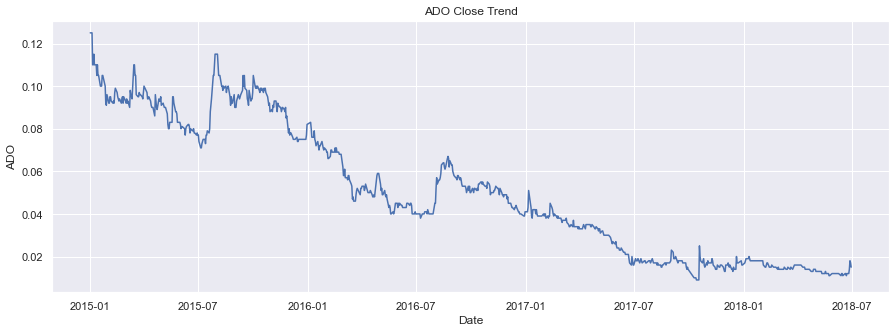

In [58]:
#Observing the trend of 'Close' for ADO stocks
sns.set(rc = {'figure.figsize':(15,5)})
sns.lineplot(data=Close_df['ADO'].dropna()).set(title='ADO Close Trend')

[Text(0.5, 1.0, 'ADO Close Autocorrelation')]

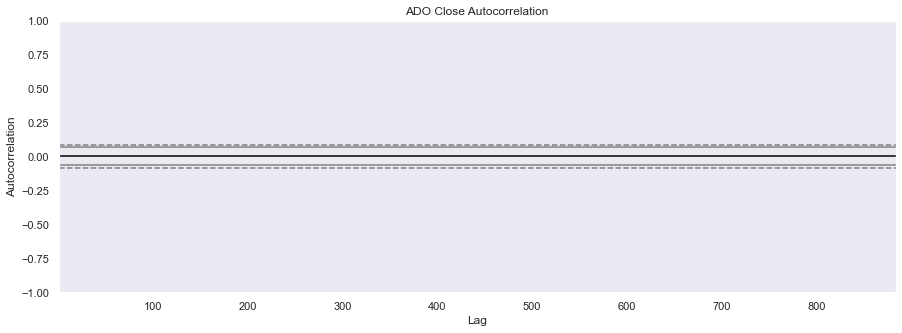

In [57]:
#Checking the autocorrelation in ADO to decide imputation method
pd.plotting.autocorrelation_plot(Close_df['ADO']).set(title='ADO Close Autocorrelation')

[Text(0.5, 1.0, 'AAA Close Autocorrelation')]

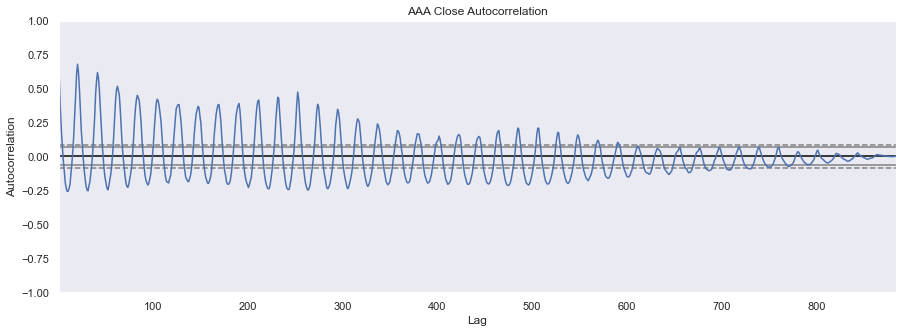

In [56]:
#See how AAA is showing autocorrelation due to seasonal changes
pd.plotting.autocorrelation_plot(Close_df['AAA']).set(title='AAA Close Autocorrelation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[Text(0.5, 1.0, 'ADO Close Lag Plot')]

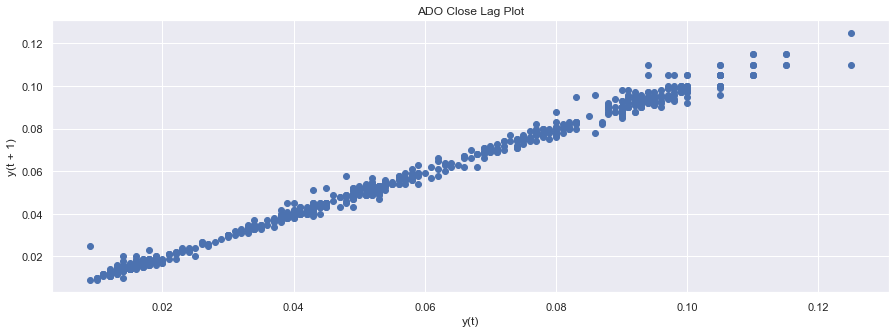

In [55]:
#Checking the lagplot for correlation between y(t) and y(t+1) for ADO. This shows one day future 'Close' value is highly correlated
#to current value.
lag_plot(Close_df['ADO'].dropna()).set(title='ADO Close Lag Plot')

In [31]:
#Observing ADO 'Close' for different imputation methods such as backward fill, foreward fill, Linear interpolation and
#interpolation with time
Close_df_bfill=Close_df.fillna(method='bfill')
Close_df_bfill['ADO'].head()

Date
2015-01-02    0.125
2015-01-05    0.125
2015-01-06    0.110
2015-01-07    0.110
2015-01-08    0.115
Name: ADO, dtype: float64

[Text(0.5, 1.0, 'ADO Close')]

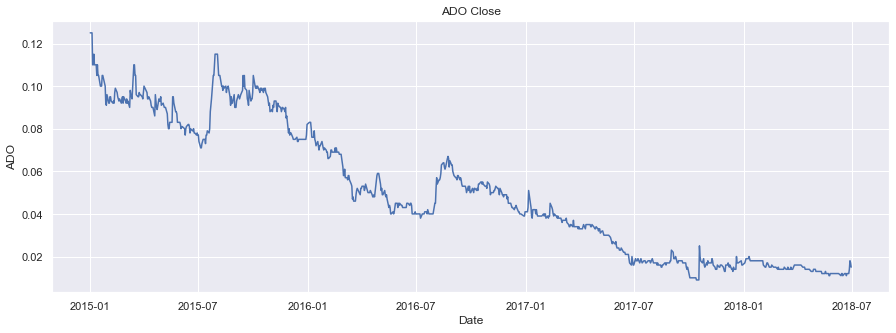

In [54]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.lineplot(data=Close_df_bfill['ADO']).set(title='ADO Close')

In [33]:
Close_df_ffill=Close_df.fillna(method='ffill')
Close_df_ffill['ADO'].head()

Date
2015-01-02    0.125
2015-01-05    0.125
2015-01-06    0.110
2015-01-07    0.110
2015-01-08    0.115
Name: ADO, dtype: float64

In [34]:
Close_df_interp_lin=Close_df.interpolate(method='linear')
Close_df_interp_lin['ADO'].head()

Date
2015-01-02    0.125
2015-01-05    0.125
2015-01-06    0.110
2015-01-07    0.110
2015-01-08    0.115
Name: ADO, dtype: float64

In [35]:
Close_df_interp_time=Close_df.interpolate(method='time')
Close_df_interp_time['ADO'].head()

Date
2015-01-02    0.125
2015-01-05    0.125
2015-01-06    0.110
2015-01-07    0.110
2015-01-08    0.115
Name: ADO, dtype: float64

In [36]:
impute_ADO_plot=pd.concat([Close_df_bfill['ADO'],Close_df_ffill['ADO'],Close_df_interp_lin['ADO'],Close_df_interp_time['ADO']],axis=1)
impute_ADO_plot.set_axis(['bfill', 'ffill','interp_lin','interp_time'], axis=1, inplace=True)
impute_ADO_plot

,bfill,ffill,interp_lin,interp_time
Date,,,,
2015-01-02,0.125,0.125,0.125,0.125
2015-01-05,0.125,0.125,0.125,0.125
2015-01-06,0.110,0.110,0.110,0.110
2015-01-07,0.110,0.110,0.110,0.110
2015-01-08,0.115,0.115,0.115,0.115
...,...,...,...,...
2018-06-25,0.012,0.012,0.012,0.012
2018-06-26,0.014,0.014,0.014,0.014
2018-06-27,0.018,0.018,0.018,0.018


Text(0.5, 1.0, 'Time Interpolation')

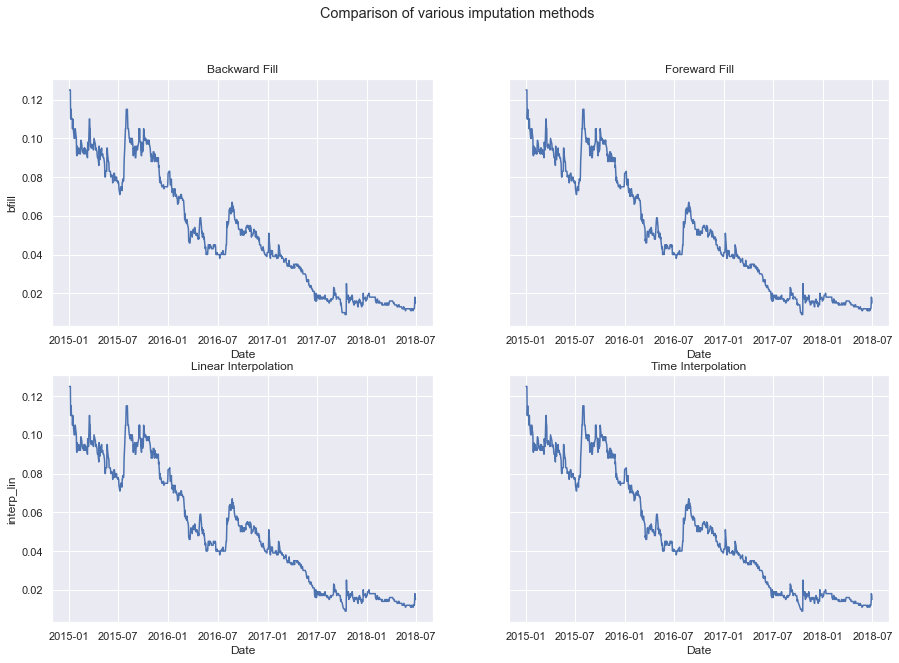

In [37]:
#Comparison of vairous imputation methods
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Comparison of various imputation methods')

sns.lineplot(ax=axes[0][0], x=impute_ADO_plot.index, y=impute_ADO_plot['bfill'])
axes[0][0].set_title('Backward Fill')

sns.lineplot(ax=axes[0][1], x=impute_ADO_plot.index, y=impute_ADO_plot['ffill'])
axes[0][1].set_title('Foreward Fill')

sns.lineplot(ax=axes[1][0], x=impute_ADO_plot.index, y=impute_ADO_plot['interp_lin'])
axes[1][0].set_title('Linear Interpolation')

sns.lineplot(ax=axes[1][1], x=impute_ADO_plot.index, y=impute_ADO_plot['interp_time'])
axes[1][1].set_title('Time Interpolation')

# Prepare Test and Train Datasets

In [38]:
#Selecting backfill to impute NaN data and creating dataframe with features for ADO
#Here onwards, LSTM will be done for only one Ticker,i.e. ADO
ADO=pd.concat([close_return['ADO'],high_low_ratios['ADO'],future_close_return['ADO']],axis=1)
ADO.set_axis(['close_return', 'high_low_ratios','future_close_return'], axis=1, inplace=True)
ADO_processed=ADO.fillna(method='bfill')
ADO_processed

,close_return,high_low_ratios,future_close_return
Date,,,
2015-01-02,0.000000,1.041667,0.000000
2015-01-05,0.000000,1.040000,-0.120000
2015-01-06,-0.120000,1.136364,0.000000
2015-01-07,0.000000,1.045455,0.045455
2015-01-08,0.045455,1.045455,-0.043478
...,...,...,...
2018-06-25,0.000000,1.200000,0.166667
2018-06-26,0.166667,1.363636,0.285714
2018-06-27,0.285714,1.285714,-0.055556


In [39]:
#Splitting the dataset to train and test data
train_set, test_set= np.split(ADO_processed, [int(.8 *len(ADO_processed))])
train_set.head(65)

,close_return,high_low_ratios,future_close_return
Date,,,
2015-01-02,0.000000,1.041667,0.000000
2015-01-05,0.000000,1.040000,-0.120000
2015-01-06,-0.120000,1.136364,0.000000
2015-01-07,0.000000,1.045455,0.045455
2015-01-08,0.045455,1.045455,-0.043478
...,...,...,...
2015-03-30,-0.010417,1.021053,-0.010526
2015-03-31,-0.010526,1.042553,0.031915
2015-04-01,0.031915,1.085106,0.030928


In [40]:
#Obtain independent and dependent data to be used in LSTM
train_set_x=train_set.iloc[:,0:2]
train_set_x

,close_return,high_low_ratios
Date,,
2015-01-02,0.000000,1.041667
2015-01-05,0.000000,1.040000
2015-01-06,-0.120000,1.136364
2015-01-07,0.000000,1.045455
2015-01-08,0.045455,1.045455
...,...,...
2017-10-09,0.000000,1.222222
2017-10-10,0.000000,1.222222
2017-10-11,0.000000,1.250000


In [41]:
train_set_y=train_set.iloc[:,2:]
train_set_y

,future_close_return
Date,
2015-01-02,0.000000
2015-01-05,-0.120000
2015-01-06,0.000000
2015-01-07,0.045455
2015-01-08,-0.043478
...,...
2017-10-09,0.000000
2017-10-10,0.000000
2017-10-11,0.000000


In [42]:
test_set

,close_return,high_low_ratios,future_close_return
Date,,,
2017-10-16,1.777778,1.125000,1.777778
2017-10-17,1.777778,1.125000,1.777778
2017-10-18,1.777778,2.500000,-0.200000
2017-10-19,-0.200000,1.550000,-0.100000
2017-10-20,-0.100000,1.277778,-0.055556
...,...,...,...
2018-06-25,0.000000,1.200000,0.166667
2018-06-26,0.166667,1.363636,0.285714
2018-06-27,0.285714,1.285714,-0.055556


In [43]:
test_set_x=test_set.iloc[:,0:2]
test_set_x

,close_return,high_low_ratios
Date,,
2017-10-16,1.777778,1.125000
2017-10-17,1.777778,1.125000
2017-10-18,1.777778,2.500000
2017-10-19,-0.200000,1.550000
2017-10-20,-0.100000,1.277778
...,...,...
2018-06-25,0.000000,1.200000
2018-06-26,0.166667,1.363636
2018-06-27,0.285714,1.285714


In [44]:
test_set_y=test_set.iloc[:,2:]
test_set_y

,future_close_return
Date,
2017-10-16,1.777778
2017-10-17,1.777778
2017-10-18,-0.200000
2017-10-19,-0.100000
2017-10-20,-0.055556
...,...
2018-06-25,0.166667
2018-06-26,0.285714
2018-06-27,-0.055556


# Scale Data

In [45]:
#LSTM is sensitive to the scale of the data. Therefore scale whole independent data and dependent data
#seperatey using StandardScaler.
scaler_x=StandardScaler()
scaled_train_set_x=scaler_x.fit_transform(train_set_x)
scaled_train_set_x

array([[ 0.04960032, -0.18188041],
       [ 0.04960032, -0.2161182 ],
       [-2.65197558,  1.76344866],
       ...,
       [ 0.04960032,  4.09784353],
       [ 0.04960032,  1.24469424],
       [-2.20171293,  1.53000917]])

In [46]:
scaler_y=StandardScaler()
scaled_train_set_y=scaler_y.fit_transform(train_set_y)
scaled_train_set_y

array([[-3.91995997e-03],
       [-1.49758766e+00],
       [-3.91995997e-03],
       [ 5.61863258e-01],
       [-5.45103908e-01],
       [-3.91995997e-03],
       [-5.69703178e-01],
       [ 5.88805316e-01],
       [-5.69703178e-01],
       [-3.91995997e-03],
       [-5.96645236e-01],
       [-3.91995997e-03],
       [-3.91995997e-03],
       [ 6.18441580e-01],
       [-3.91995997e-03],
       [-5.96645236e-01],
       [-9.99698424e-01],
       [-1.39215947e-01],
       [ 6.79993820e-01],
       [-5.22554577e-01],
       [-3.91995997e-03],
       [ 4.01968001e-01],
       [-3.91995997e-03],
       [-2.65966924e-01],
       [-1.37761151e-01],
       [ 1.31376027e-01],
       [-1.37761151e-01],
       [ 6.72559975e-01],
       [ 2.52723974e-01],
       [-2.55379168e-01],
       [-2.60563894e-01],
       [-1.34943442e-01],
       [-1.36337309e-01],
       [ 1.29921231e-01],
       [-2.68754658e-01],
       [ 2.66672014e-01],
       [ 1.28497389e-01],
       [-3.96990406e-01],
       [ 4.0

In [47]:
#Generate x_train that contain a series of 60 feature values for each record and corresponding dependent variable in y_train
x_train=[]
y_train=[]

for i in range(60, len(scaled_train_set_x)):
    x_train.append(scaled_train_set_x[i - 60:i, 0:scaled_train_set_x.shape[1]])
    y_train.append(scaled_train_set_x[i:i + 1, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
x_train,y_train = np.array(x_train), np.array(y_train)


[array([[ 0.04960032, -0.18188041],
       [ 0.04960032, -0.2161182 ],
       [-2.65197558,  1.76344866],
       [ 0.04960032, -0.10406724],
       [ 1.07292452, -0.10406724],
       [-0.92923153,  1.0164423 ],
       [ 0.04960032,  1.0164423 ],
       [-0.97372389, -0.05960258],
       [ 1.12165424, -0.05960258],
       [-0.97372389, -0.03083133],
       [ 0.04960032, -1.03782519],
       [-1.02245361, -0.01069145],
       [ 0.04960032, -0.01069145],
       [ 0.04960032, -0.01069145],
       [ 1.17525694, -0.43362887],
       [ 0.04960032, -0.01069145],
       [-1.02245361, -0.01069145],
       [-1.75145028,  1.24469424],
       [-0.19510765,  0.15651637],
       [ 1.28658561,  1.86494409],
       [-0.88844687,  0.30191447],
       [ 0.04960032, -0.36795536],
       [ 0.7837242 , -0.14466541],
       [ 0.04960032, -0.59604724],
       [-0.42436037, -0.37515826],
       [-0.19247638, -0.5912453 ],
       [ 0.29430828, -0.5912453 ],
       [-0.19247638, -0.5912453 ],
       [ 1.27314012

In [48]:
#Check shapes of both x_train and y_train
print('x_train shape == {}.'.format(x_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

x_train shape == (646, 60, 2).
y_train shape == (646, 1).


# Build the LSTM Model

In [49]:
#Import libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [50]:
#Building the model with LSTM,Dropout and Dense layers. Dropout helps to avoid overfitting
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 64)            17152     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5842 - val_loss: 1.9293
Epoch 2/25
21/21 [==============================] - 1s 25ms/step - loss: 0.5606 - val_loss: 1.3481
Epoch 3/25
21/21 [==============================] - 1s 25ms/step - loss: 0.5648 - val_loss: 1.3396
Epoch 4/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5517 - val_loss: 1.2891
Epoch 5/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5551 - val_loss: 1.3602
Epoch 6/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5610 - val_loss: 1.4045
Epoch 7/25
21/21 [==============================] - 1s 27ms/step - loss: 0.5491 - val_loss: 1.4166
Epoch 8/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5541 - val_loss: 1.3096
Epoch 9/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5610 - val_loss: 1.3303
Epoch 10/25
21/21 [==============================] - 1s 26ms/step - loss: 0.5390 - val_loss: 1.3389
Epoch 11/

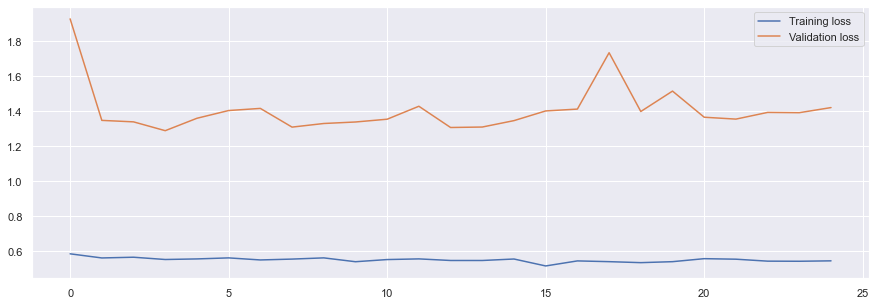

In [61]:
#Training the model
#STILL WORKING ON THIS PART TO OPTIMISE THE MODEL
history = model.fit(x_train, y_train, epochs=25, batch_size=16, validation_split=0.5, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Model Performance and Evaluation

In [ ]:
#Predict for train dataset and compare predicted and actual values

In [ ]:
#Predict for test dataset and compare predicted and actial values